<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson7/dz7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  35 баллов
* Задача 2 &mdash;  30 баллов






-----

In [ ]:
# Bot check

# HW_ID: phds_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
!pip install catboost
import numpy as np
import pandas as pd
import scipy.stats as sps

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils import shuffle

plt.rcParams['axes.facecolor'] = 'lightgrey'
sns.set(palette='Set2', font_scale=1.6)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


# Применения градиентного бустинга.

Градиентный бустинг может быть применен в огромном множестве реальных задач.

Реальные задачи, где применяется бустинг:    

☣

[Бустинг в предсказании лекарств](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-017-0209-z)

[Предсказание сайтов связывания белков с ДНК](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2527-1)

[Оценивание качества молекулярного докинга](https://pubmed.ncbi.nlm.nih.gov/30873528/)

[Бустинг и нейросети в задаче оценивания влияния вариаций в некодирующих регионах ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4768299/)

⚛

[Smuon collider analysis](https://arxiv.org/abs/2109.11815): применяется бустинг, PCA, отбор признаков.


[Бустинг и бозон Хиггса](http://proceedings.mlr.press/v42/chen14.pdf)


🏫

[Предсказание распределения студентов](https://www.researchgate.net/publication/338853863_STUDENT_PLACEMENT_PREDICTION_MODEL_USING_GRADIENT_BOOSTED_TREE_ALGORITHM)


[Моделирование индивидуального профиля студента](https://www.igi-global.com/article/student-profile-modeling-using-boosting-algorithms/284084)

# Задача 1

**Внимание!**

Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

*Совет. При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки оставшегося времени работы используйте tqdm в циклах.*

Для исследования вам предлагается несколько датасетов:

### 1. **Профиль биология:** [Датасет](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure) про физикохимические свойства третичной структуры белков.

В этом датасете содержатся следующие признаки:
```
 RMSD-Size of the residue.
 F1 - Total surface area.
 F2 - Non polar exposed area.
 F3 - Fractional area of exposed non polar residue.
 F4 - Fractional area of exposed non polar part of residue.
 F5 - Molecular mass weighted exposed area.
 F6 - Average deviation from standard exposed area of residue.
 F7 - Euclidian distance.
 F8 - Secondary structure penalty.
 F9 - Spacial Distribution constraints (N,K Value).
```




Мы будем предсказывать размер остатка (RMSD) по остальным признакам.
Датасет был получен с помощью [CASP9](https://predictioncenter.org/CASP9/).




Скачать датасет можно с помощью `sklearn`:

In [5]:
from sklearn.datasets import fetch_openml

protein = fetch_openml(name='physicochemical-protein')
data = pd.DataFrame(protein.data, columns=protein.feature_names)
X, y = data.drop("RMSD", axis=1), data.RMSD

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Этот датасет большой по размеру, так что можете взять в качестве данных его случайную половину.

### 2. **Профиль физика:**  [Датасет](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) про излучение Черенкова.


Не забудьте назвать колонки в соотсветствии с признаками (см. описание датасета). Целевой меткой является переменная `class`. Преобразуйте метки классов в числа для корректной работы бустинга.

In [7]:
!wget https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip
!unzip magic+gamma+telescope.zip

--2023-10-28 16:09:11--  https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic+gamma+telescope.zip.1’

magic+gamma+telesco     [  <=>               ] 631.48K  1.62MB/s    in 0.4s    

2023-10-28 16:09:12 (1.62 MB/s) - ‘magic+gamma+telescope.zip.1’ saved [646639]

Archive:  magic+gamma+telescope.zip
  inflating: magic04.data            
  inflating: magic04.names           


In [72]:
cols = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class"
]

df = pd.read_csv('magic04.data',header=None)
df.columns = cols

In [43]:
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [38]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [73]:
df['class'], _ = pd.factorize(df['class'])

In [41]:
df['class'].value_counts()

0    12332
1     6688
Name: class, dtype: int64

In [107]:
X, y= df.iloc[:,:-1],df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y)

### 1.

Повторите исследование, проведенное в предыдущем домашнем задании, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом.

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 3 до 15].
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.
5. Исследуйте время работы фита и предикта, среднюю глубину деревьев и количество листьев в дереве.

*Замечания.*
* В качестве основы можно использовать свое решение предыдущего задания. В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.
* Используйте `tqdm` для оценки времени выполнения кода.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

### Варьируем гиперпараметры

n_estimators
Бустинг чувствителен к размеру ансамбля. Видим монотонный рост в целевой метрики даже на правой границе гиперпараметра

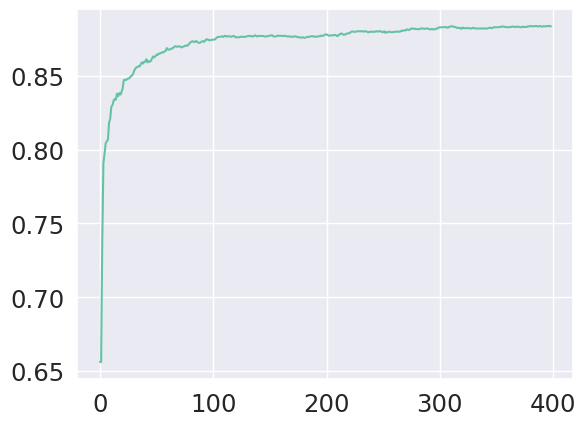

In [32]:
gb = GradientBoostingClassifier(n_estimators=400).fit(X_train,y_train)
estimators = gb.estimators_
acc_n_est = []
for i in range(1,len(estimators)):
    gb.estimators_ = estimators[:i]
    acc_n_est.append(gb.score(X_test,y_test))
plt.plot(acc_n_est)

max_depth

Бустинг не чувствителен к изменению этого гиперпараметра при большом ансамбле. Имеет смысл брать неглубокие деревья для более быстрого обучения и предсказания

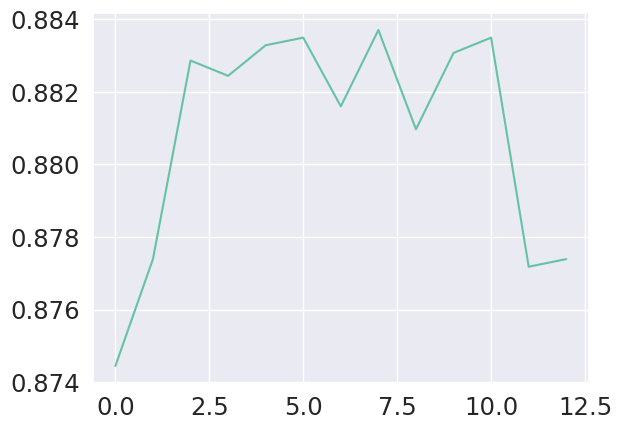

In [33]:
from tqdm import tqdm
max_depth = list(range(3,16))
plt.plot(max_depth,[GradientBoostingClassifier(max_depth=n).fit(X_train,y_train).score(X_test,y_test) for n in tqdm(range(3,16))])

Learning rate

Задаёт коэффициент при весе нового предиката. На смысловом уровне задает величину шага в направление антиградиента функции потери

Learning rate имеет смысл искать в оркестности от 0.1 до 1

100%|██████████| 7/7 [00:47<00:00,  6.86s/it]


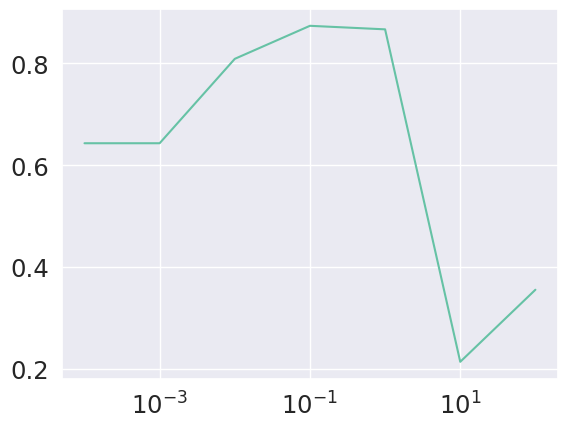

In [47]:
lrs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
plt.plot(lrs,[GradientBoostingClassifier(learning_rate=lr).fit(X_train,y_train).score(X_test,y_test) for lr in tqdm(lrs)])
plt.xscale("log")
pass

### Проверяем стохастическую природу обучения


Обучение и предсказание бустинга не стохастично при стандартных настройках

Но этого можно добиться ограничив max_features до половины признаков


In [49]:
[GradientBoostingClassifier().fit(X_train,y_train).score(X_test,y_test) for _ in range(3)]

[0.8729758149316509, 0.8729758149316509, 0.8729758149316509]

In [93]:
[GradientBoostingClassifier(max_features=1/3).fit(X_train,y_train).score(X_test,y_test) for _ in range(3)]

[0.8691903259726603, 0.8635120925341746, 0.8658254468980021]

### Подбираем параметры на кросс-валидация



In [77]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier(random_state=42)
param_grid={
      'max_depth': [3,5,7],
      'n_estimators': [10,50,100],
      'learning_rate': [2,1.5,1,0.5,0.1]
}

tree_gridsearch = GridSearchCV(estimator,param_grid,verbose=2)

In [78]:
tree_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ......learning_rate=2, max_depth=3, n_estimators=10; total time=   1.1s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=10; total time=   0.8s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=10; total time=   0.7s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=10; total time=   1.4s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=10; total time=   0.6s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=50; total time=   3.3s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END ......learning_rate=2, max_depth=3, n_estimators=50; total time=   2.4s
[CV] END .....learning_rate=2, max_depth=3, n_estimators=100; total time=   5.5s
[CV] END .....learning_rate=2, max_depth=3, n_e

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [2, 1.5, 1, 0.5, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

Лучшие результаты получили при максимальном значении n_estimators и learning_rate=0.1. Деревья достаточно глубокие max_depth=7

In [88]:
results = pd.DataFrame(tree_gridsearch.cv_results_)
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,11.976974,2.249427,0.014899,0.001735,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.878724,0.879075,0.878724,0.875570,0.875219,0.877462,0.001697,1
43,5.584614,0.394868,0.009910,0.001417,0.1,7,50,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.873817,0.879776,0.875570,0.872766,0.873116,0.875009,0.002572,2
41,8.024636,0.436029,0.011015,0.000383,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.870312,0.877673,0.879075,0.874168,0.873116,0.874869,0.003158,3
29,4.926072,0.346262,0.007961,0.001146,0.5,3,100,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.875920,0.876271,0.870312,0.871714,0.865405,0.871924,0.004000,4
40,4.076174,0.242991,0.008890,0.001420,0.1,5,50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.870312,0.873467,0.873467,0.872415,0.868559,0.871644,0.001925,5
35,11.157338,0.139894,0.013304,0.001351,0.5,7,100,"{'learning_rate': 0.5, 'max_depth': 7, 'n_esti...",0.876621,0.866807,0.873116,0.866456,0.870662,0.870733,0.003849,6
28,2.504533,0.331175,0.005400,0.000236,0.5,3,50,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.871013,0.878374,0.866456,0.871363,0.863302,0.870102,0.005106,7
38,4.991260,0.322359,0.009739,0.001711,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.864704,0.875219,0.869260,0.869611,0.870312,0.869821,0.003344,8
34,5.544319,0.362199,0.008793,0.001119,0.5,7,50,"{'learning_rate': 0.5, 'max_depth': 7, 'n_esti...",0.871363,0.863652,0.869961,0.858745,0.868910,0.866526,0.004684,9
31,3.969855,0.208715,0.008389,0.001841,0.5,5,50,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",0.863302,0.867858,0.872415,0.861549,0.863652,0.865755,0.003922,10


In [83]:
tree_gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Исследуем `max_features`
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Согласно документации

- If int, values must be in the range [1, inf).

- If float, values must be in the range (0.0, 1.0] and the features considered at each split will be max(1, int(max_features * n_features_in_)).

- If ‘sqrt’, then max_features=sqrt(n_features).

- If ‘log2’, then max_features=log2(n_features).

- If None, then max_features=n_features.


100%|██████████| 9/9 [01:09<00:00,  7.70s/it]


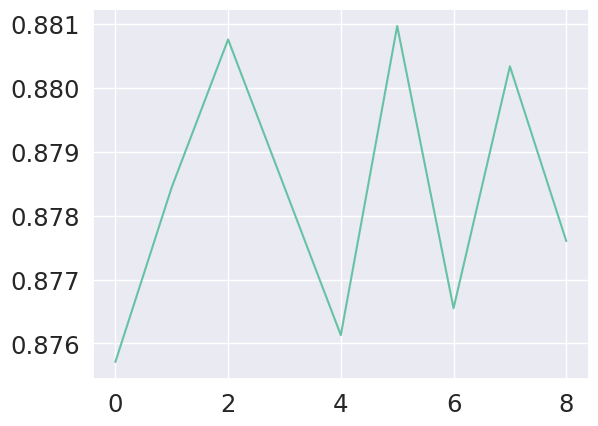

In [92]:
params ={'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
plt.plot([GradientBoostingClassifier(**params,max_features=feat_dim).fit(X_train,y_train).score(X_test,y_test) for feat_dim in tqdm(range(1,len(X_train.columns)))])

При заднных гиперпараметрах метрика не чувствительна к размеру признакового пространства в сплите дереве. Это связано с достаточным размером ансамбля и достаточно большой глубиной дерева. -> пространство параметров достаточно велико, чтобы стохастически подобрать нужные для задачи комбинации сплитов на признаках. Для проверки гипотезы возьмем малый ансамбль неглубоких деревьев




  0%|          | 0/9 [00:00<?, ?it/s]

 11%|█         | 1/9 [00:00<00:07,  1.13it/s]

 22%|██▏       | 2/9 [00:01<00:04,  1.73it/s]

 33%|███▎      | 3/9 [00:01<00:02,  2.11it/s]

 44%|████▍     | 4/9 [00:02<00:02,  2.20it/s]

 56%|█████▌    | 5/9 [00:02<00:01,  2.16it/s]

 67%|██████▋   | 6/9 [00:02<00:01,  2.14it/s]

 78%|███████▊  | 7/9 [00:03<00:00,  2.15it/s]

 89%|████████▉ | 8/9 [00:03<00:00,  2.08it/s]

100%|██████████| 9/9 [00:04<00:00,  1.99it/s]


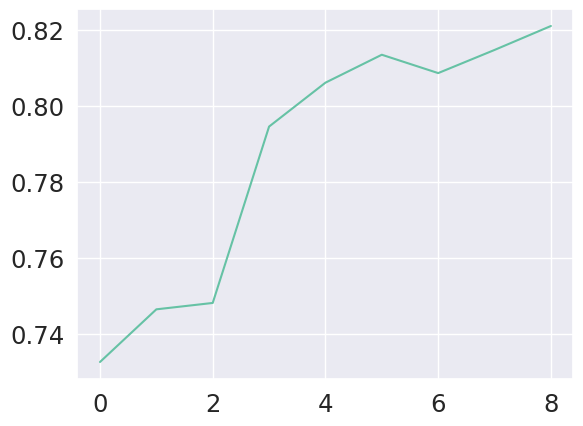

In [99]:
plt.plot([GradientBoostingClassifier(max_depth=3,max_features=feat_dim,n_estimators=10).fit(X_train,y_train).score(X_test,y_test) for feat_dim in tqdm(range(1,len(X_train.columns)))])

Гипотеза подтвердилась :)
На суженом пространстве параметре есть выраженная зависимость от гиперпараметра `max_features`

### Время обучения и предсказния

In [86]:
results.loc[results['rank_test_score']==1,['mean_fit_time','mean_score_time']]

,mean_fit_time,mean_score_time
44,11.976974,0.014899


### Оцениваем среднюю глубину дерева и число листьев

In [50]:
gb = GradientBoostingClassifier(n_estimators=400, max_depth = 10).fit(X_train,y_train)

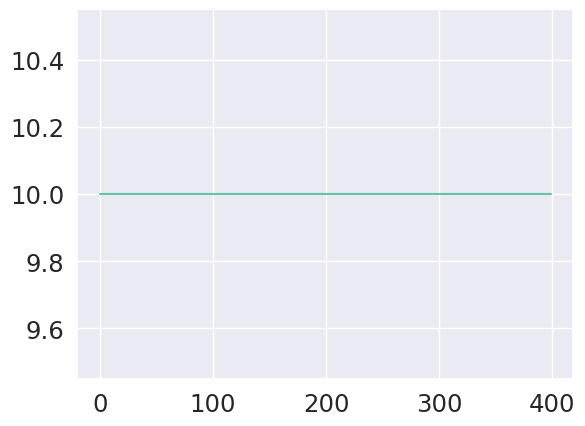

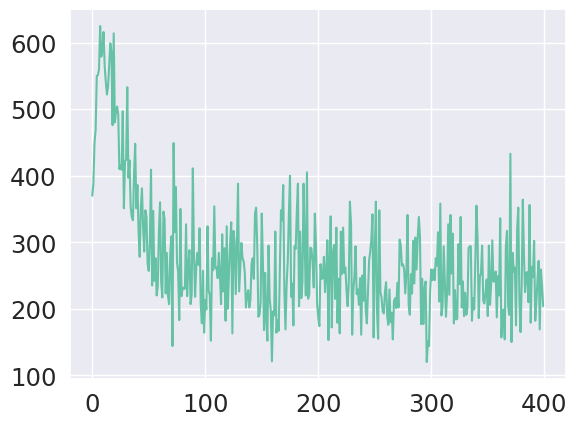

In [58]:
plt.plot([est[0].get_depth() for est in gb.estimators_])
plt.show()
plt.plot([est[0].get_n_leaves() for est in gb.estimators_])

Все деревья обучаются на максимальную глубину, но число листьев уменьшается с ростом дерева

### 2.

Выберите самый значимый признак согласно `feature_importances_`. Визуализируйте работу бустинга, обученного только на одном этом признаке.

Для этого рассмотрите процесс построения бустинга для первых 10 итераций. При визуализации требуется для каждой итерации нарисовать:
* предсказания новой базовой модели и выборку, на которой эта базовая модель обучается;
* предсказания текущей композиции и исходную обучающую выборку.

Пример графиков смотрите в лекции в разделе бустинг в задаче регресии.

 22%|██▏       | 2/9 [2:26:19<8:32:08, 4389.84s/it]


<BarContainer object of 10 artists>

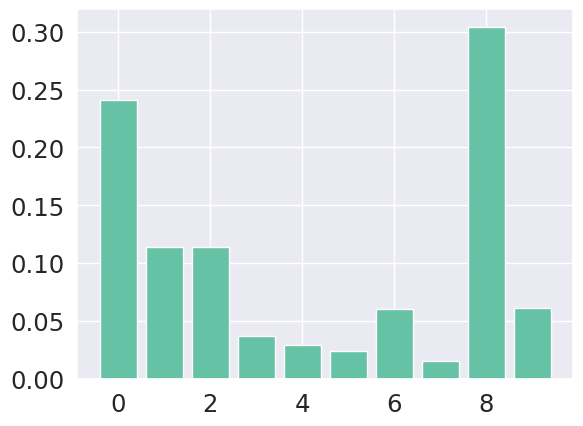

In [109]:
imp = GradientBoostingClassifier(**params).fit(X_train,y_train).feature_importances_

plt.bar(range(10),imp)

In [176]:
best_train_feature = X_train.iloc[:,8].values.reshape(-1,1)
best_test_feature = X_test.iloc[:,8].values.reshape(-1,1)

In [126]:
gb = GradientBoostingClassifier(max_depth=3, n_estimators=10).fit(best_train_feature,y_train)
gb.score(best_test_feature,y_test)

0.7333333333333333

In [123]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(max_depth=3).fit(best_train_feature,y_train).score(best_test_feature,y_test)

0.7343848580441641

На одном признаке дерево обучается не хуже :)

### Предсказания новой базовой модели и выборку, на которой эта базовая модель обучается

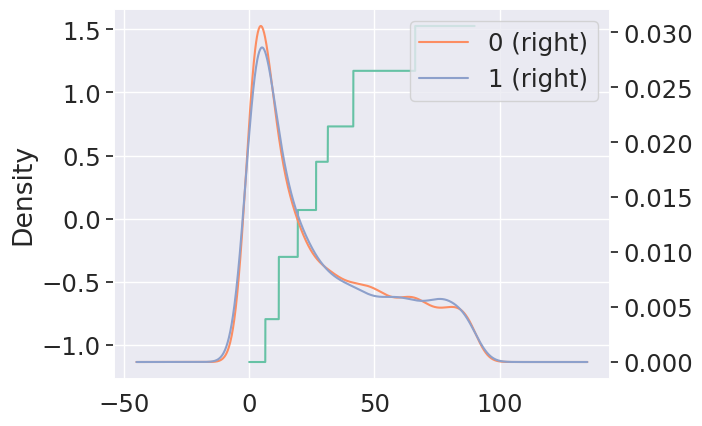

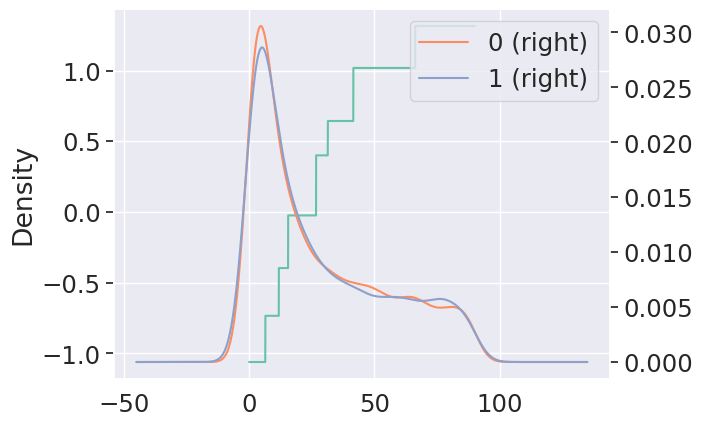

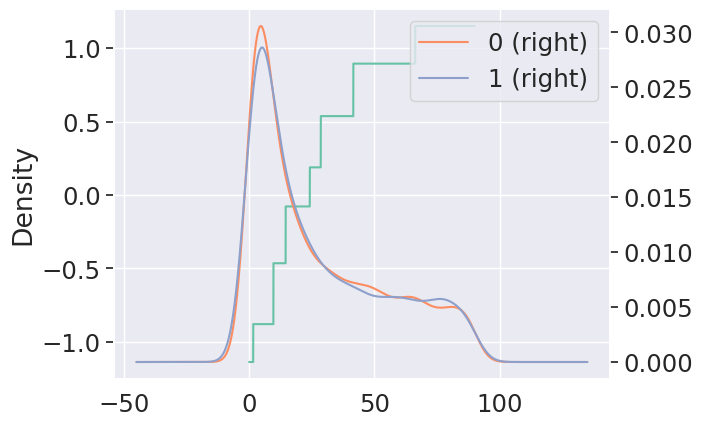

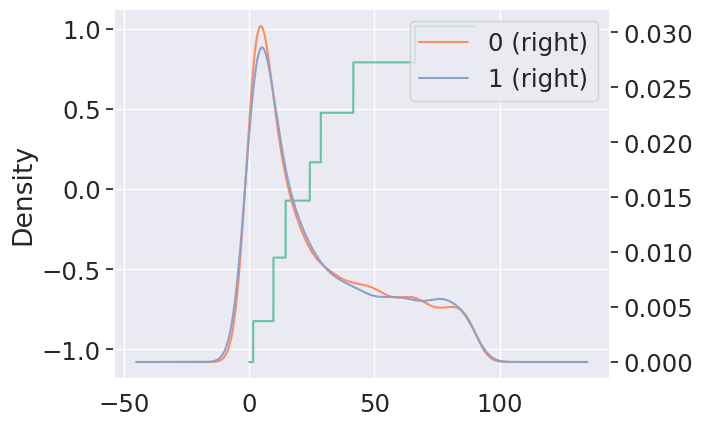

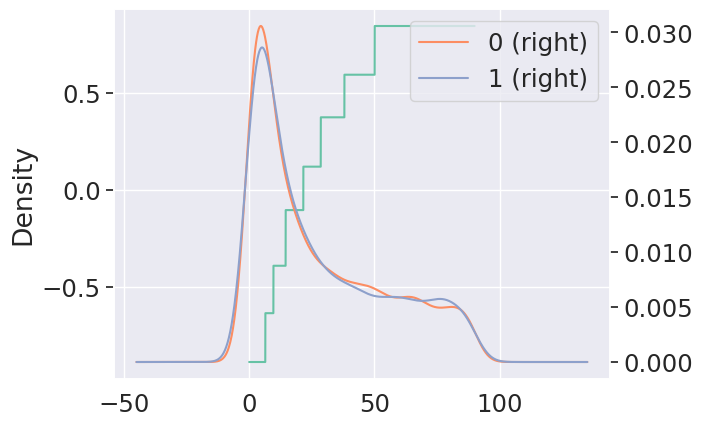

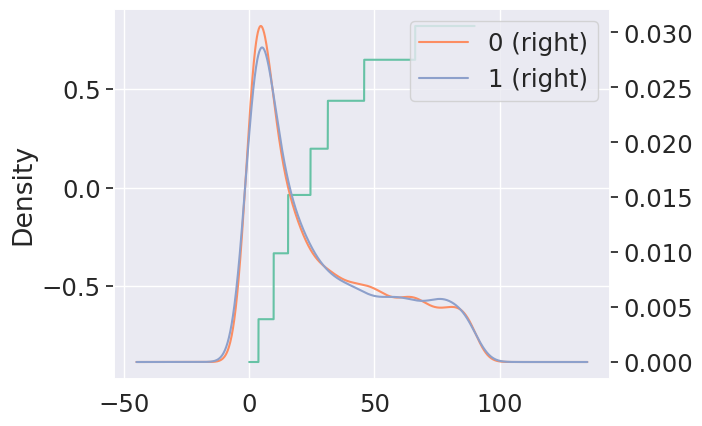

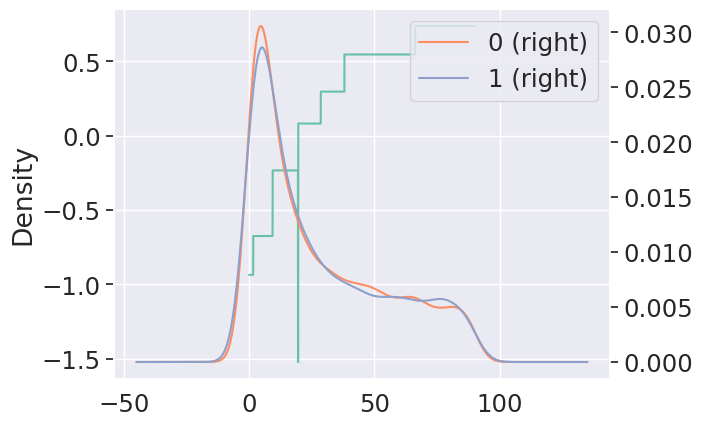

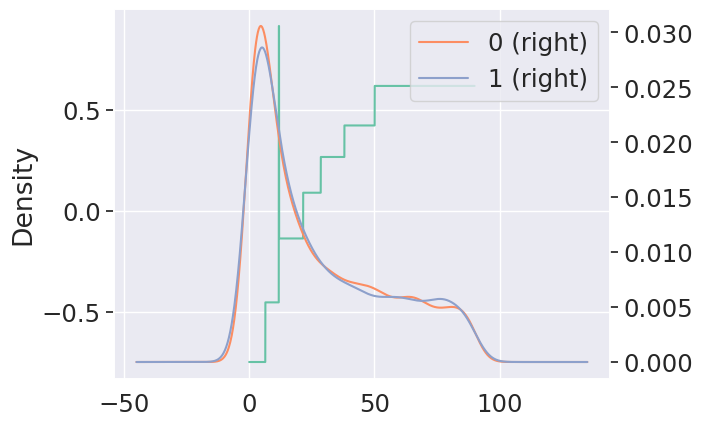

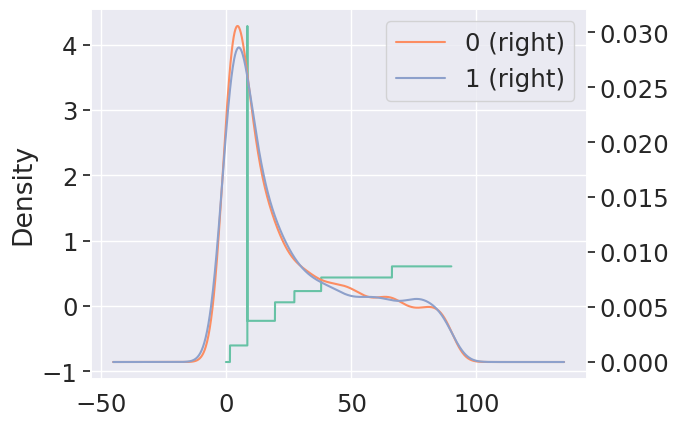

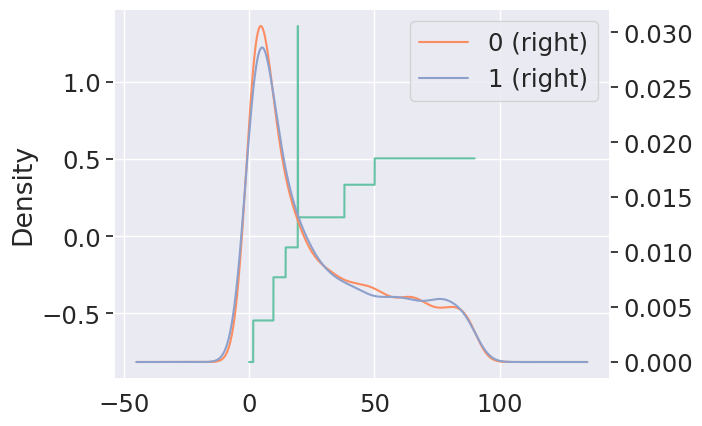

In [202]:
train_data = np.sort(best_train_feature)

tmp = pd.DataFrame({'x': train_data.squeeze(),'y':y_train})
tmp_grp = tmp.groupby('y')['x']
for i,est in enumerate(gb.estimators_):
    plt.plot(train_data,est[0].predict(train_data))
    tmp_grp.plot.kde(secondary_y = True)
    fig.suptitle(f'Итерация {i}')
    plt.legend()
    plt.show()


### Предсказания текущей композиции и исходную обучающую выборку.

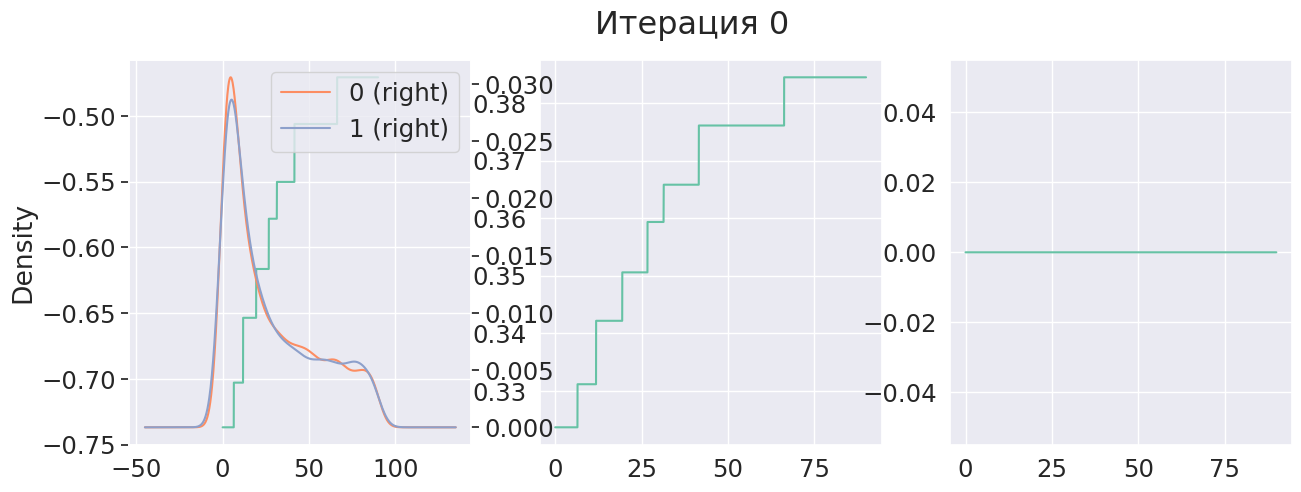

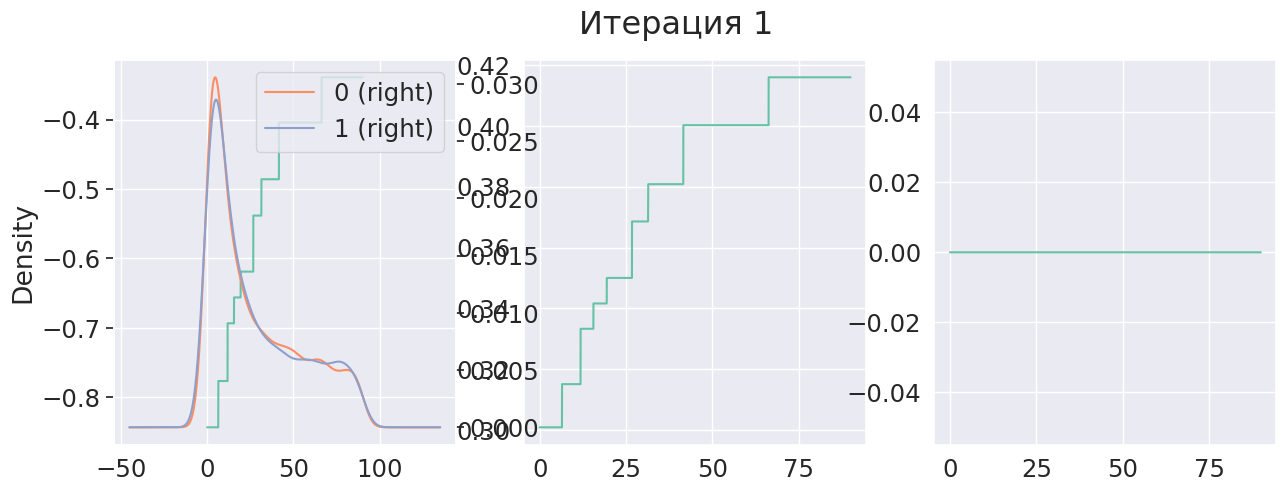

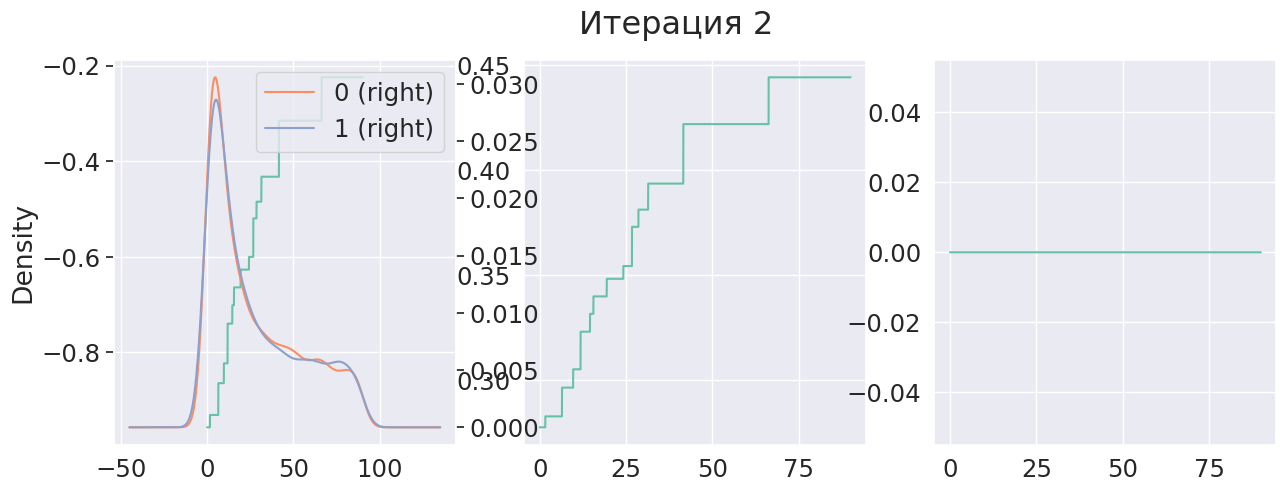

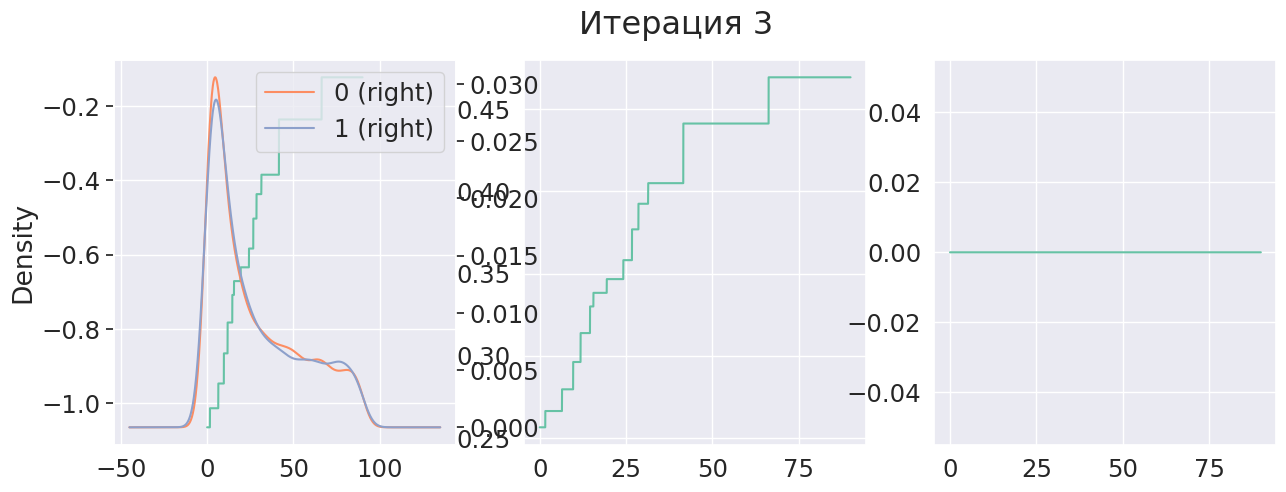

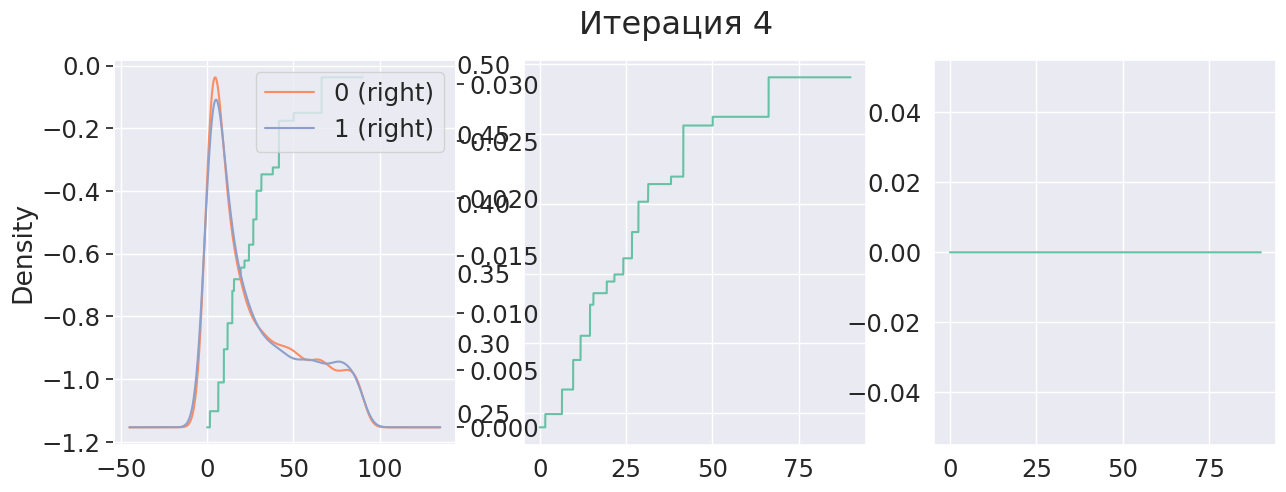

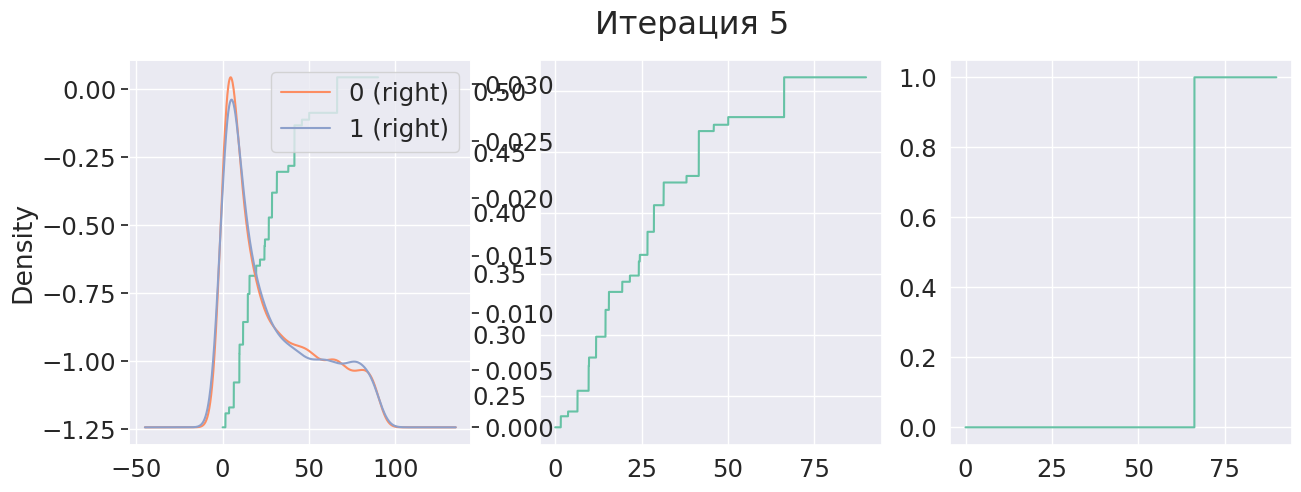

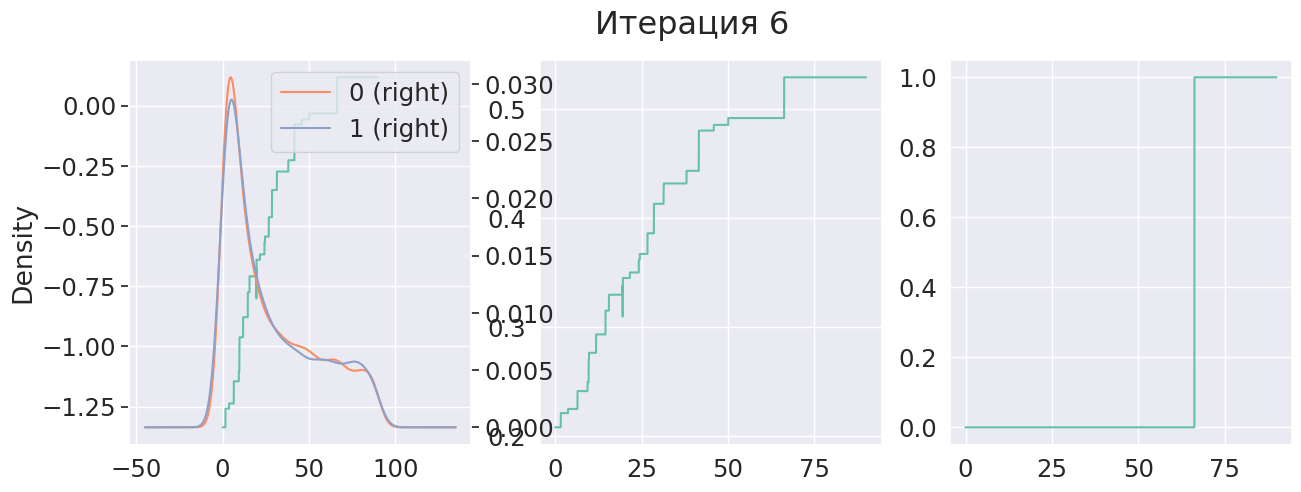

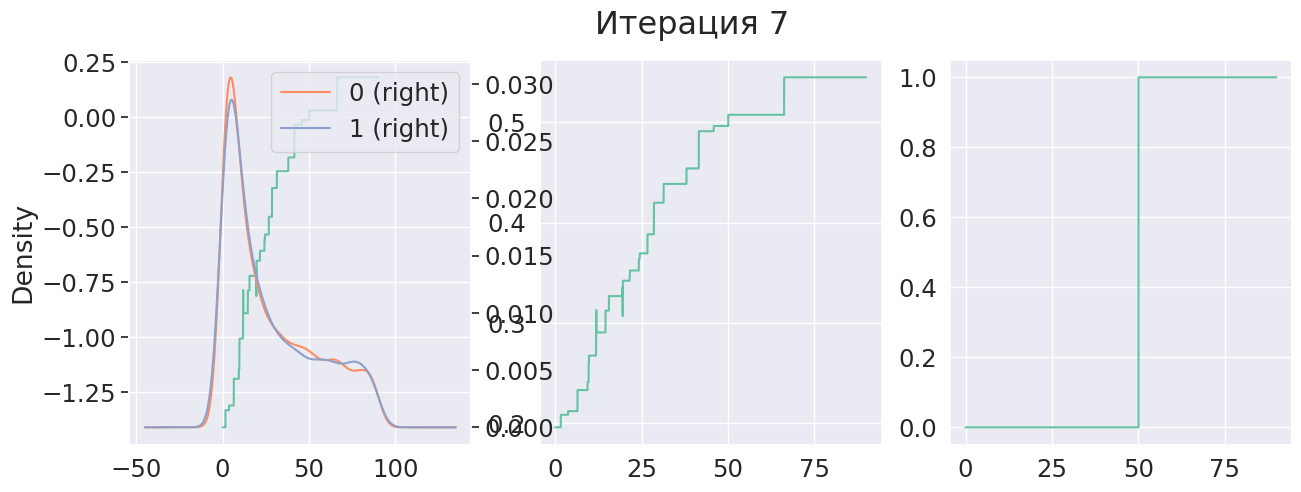

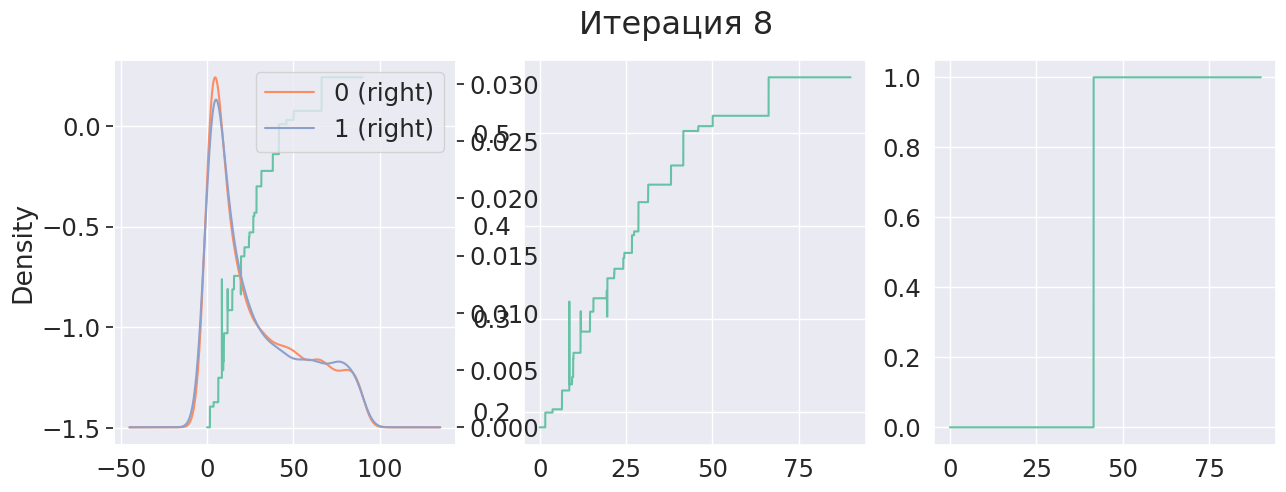

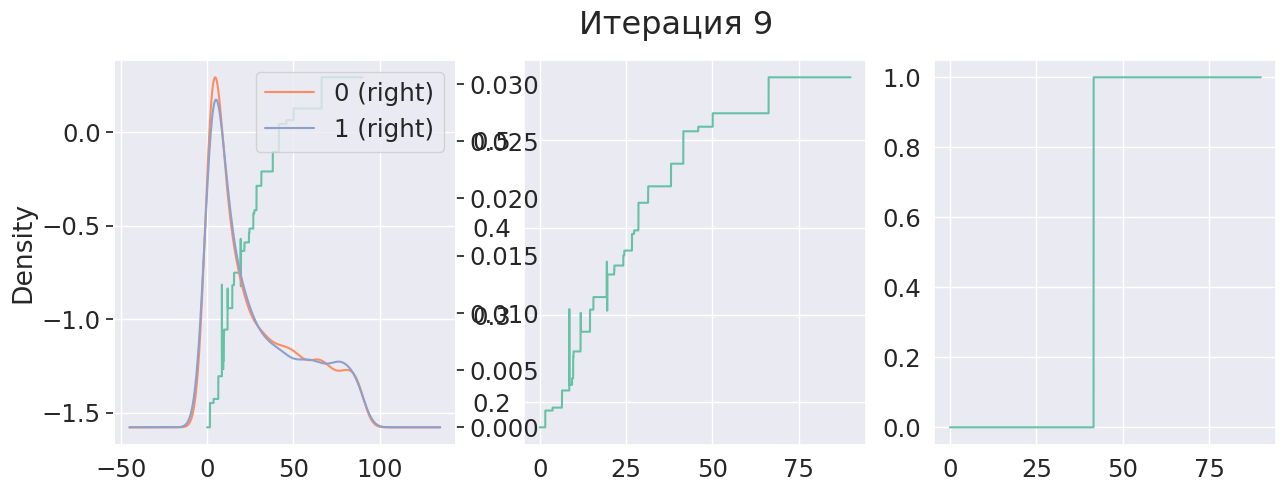

In [201]:
train_data = np.sort(best_train_feature)
for i,(desc_func,pred,label) in enumerate(zip(gb.staged_decision_function(train_data),gb.staged_predict_proba(train_data),gb.staged_predict(train_data))):
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    ax[0].plot(train_data,desc_func,label='Decision function')
    ax[1].plot(train_data,pred[:,1],label='Predict proba')
    ax[2].plot(train_data,label,label='Predict')

    tmp_grp.plot.kde(secondary_y = True,ax=ax[0])

    plt.legend()
    fig.suptitle(f'Итерация {i}')
    plt.show()


### Качество калибровки модели
Для соотнесения предсказаний используем калибровочные кривые - gain_chart. Я применил более робастный споособ через равноквантильное разрезание по модельному скору.

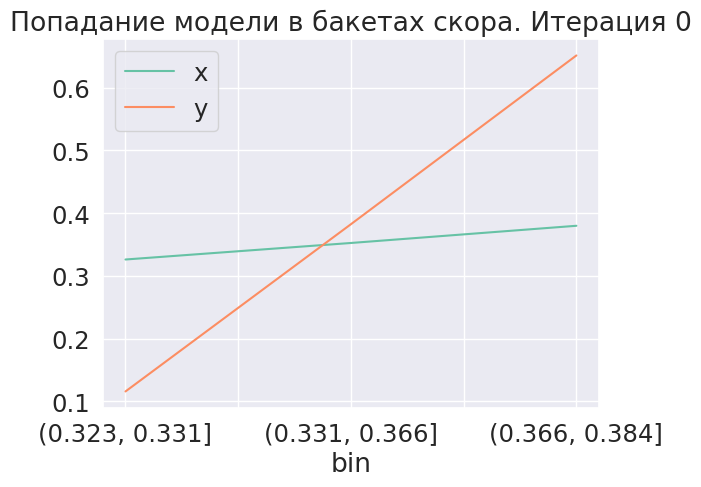

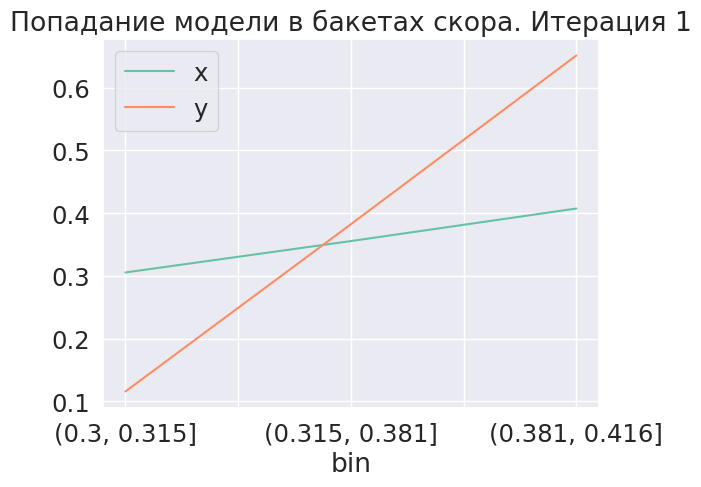

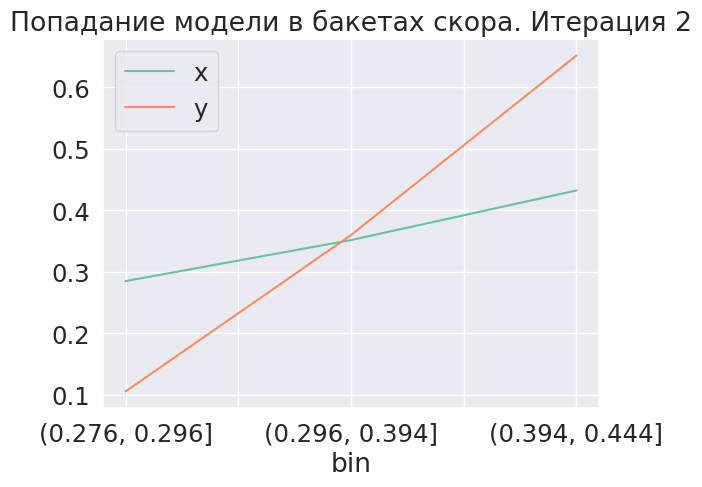

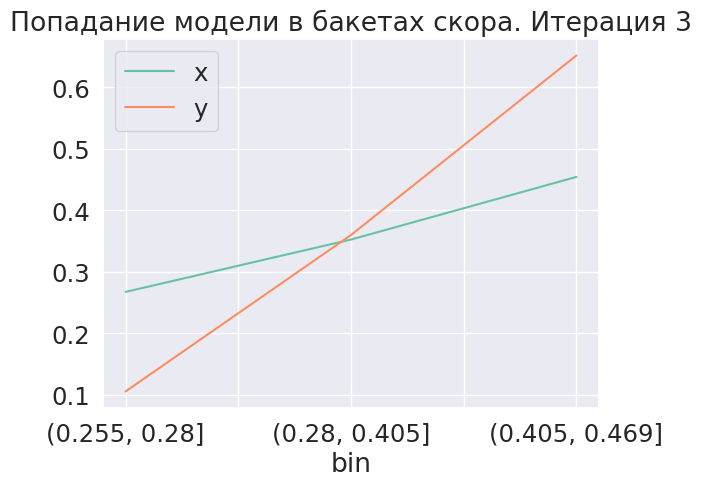

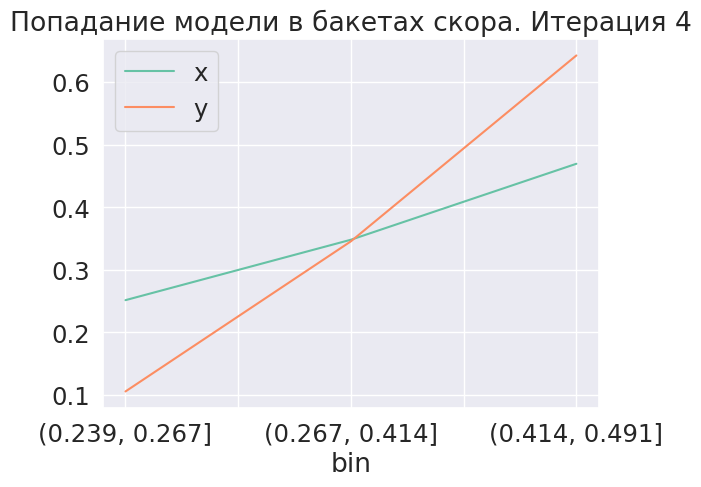

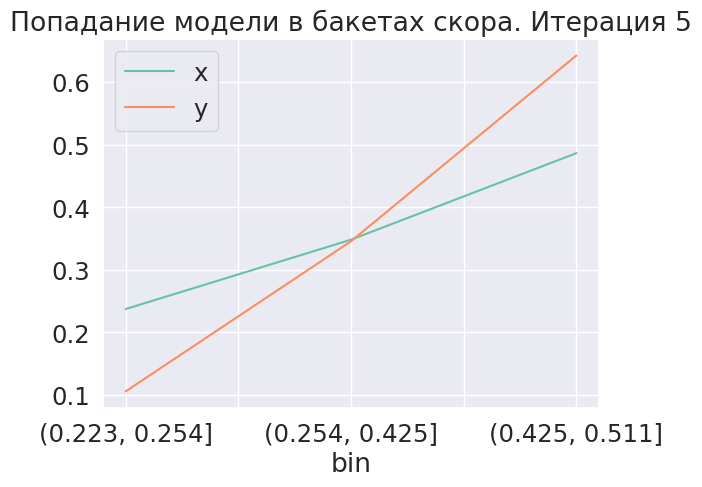

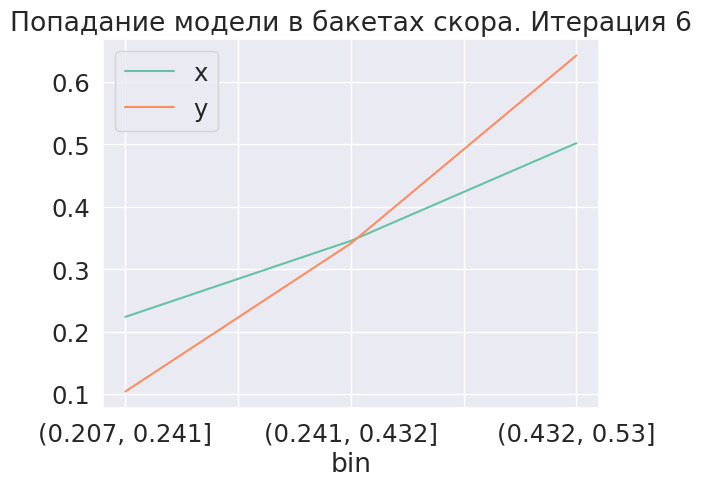

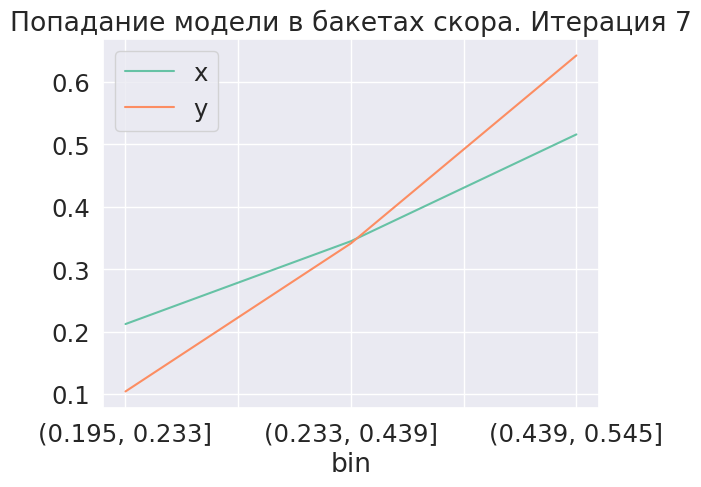

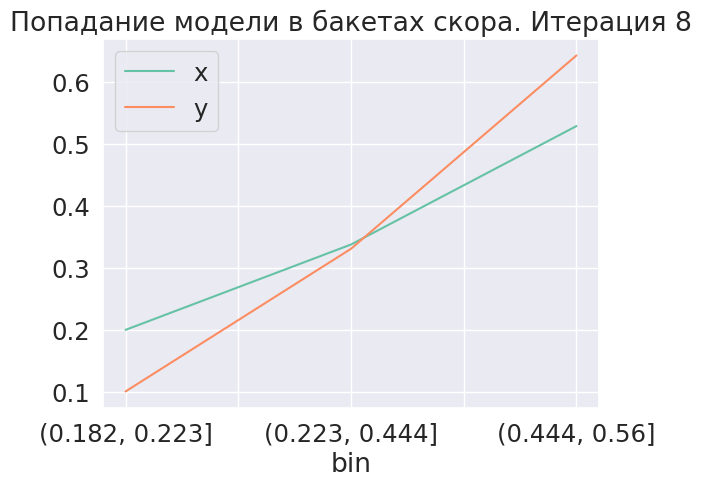

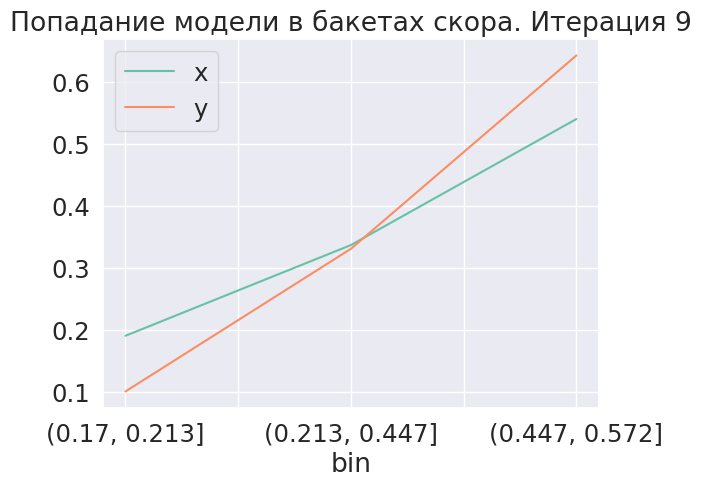

In [171]:
for i,pred in enumerate(gb.staged_predict_proba(best_train_feature)):
    pred_df = pd.DataFrame({
        'x': pred[:,1],
        'y': y_train
    })
    pred_df['bin'] = pd.qcut(pred_df['x'],3)
    pred_df.groupby('bin')[['x','y']].mean().plot()
    plt.title('Попадание модели в бакетах скора. Итерация {}'.format(i))
    plt.show()

Калибровка модели улучшается с ростом числа estimator-ов

In [ ]:
plt.plot(best_train_feature)

In [ ]:
from sklearn.tree import plot_tree
plot_tree()

# Задача 2


Возьмем данные из предыдущего дз.

Исследуйте зависимость качества по метрике MAPE для моделей XGBoost, LightGBM,
CatBoost, а так же градиентного бустинга из sklearn, в зависимости от количества
деревьев, их максимальной глубины, шага обучения, а также различных регуляризаций.  При исследовании одного гиперпараметра рисуйте один график для всех моделей. Тщательно подберите цвета и тип линий так, чтобы картинка была легко читаемой. При проведении исследований не забывайте писать подробные комментарии
и выводы.

*Совет. Изучите ноутбук про данные фреймворки.*


В качестве данных возьмём следующие датасеты:

**Профиль физика:** <https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi>. Будем предсказывать длительность солнечных вспышек. Используйте файл с данными до 2018 года.

**Профиль биология:** <https://archive.ics.uci.edu/dataset/1/abalone>. Будем предсказывать возраст моллюсков.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

#### Загрузка и предобработка данных:

In [60]:
!pip install opendatasets

In [62]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 6.43M/6.43M [00:00<00:00, 61.2MB/s]

**Физика:**

In [240]:
data = pd.read_csv('solar-flares-rhessi/hessi.solar.flare.UP_To_2018.csv')

Уберем категориальные признаки, а также дату и время начала и время конца вспышки:

In [241]:
data = data.drop(['flare', 'start.date', 'start.time', 'end', 'flag.1', 'flag.2', 'flag.3', 'flag.4', 'flag.5'], axis=1)
X = data.drop('duration.s', axis=1)
y = data['duration.s']

### Достаем фичи из времени `peak`

In [243]:
X['peak'] = pd.to_datetime(X['peak'])

X['peak_hour'] = X['peak'].dt.hour
X['peak_minute'] = X['peak'].dt.minute
X['peak_second'] = X['peak'].dt.second
X.drop('peak',axis=1,inplace=True)

Факторизуем категориальные признаки

In [253]:
X['energy.kev'],_ = pd.factorize(X['energy.kev'])


In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [245]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

### XGBoost

In [210]:
!pip install xgboost

In [255]:
X_train

,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,peak_hour,peak_minute,peak_second
3864,64,146952.0,0,714,-384,811,44,6,26,10
19665,23,33672.0,1,-154,32,157,436,8,48,58
54120,25,18346.0,1,788,209,815,1166,3,57,46
45628,47,30215.0,0,-976,-116,983,0,12,7,50
17657,0,274.0,1,889,218,915,397,17,38,26
...,...,...,...,...,...,...,...,...,...,...
52076,60,82944.0,1,-871,449,980,0,4,0,10
24483,24,7488.0,1,-748,-172,768,536,23,52,22
111234,250,374447.0,1,-707,-402,814,0,8,18,14
77571,26,38640.0,1,-167,162,233,1696,14,11,22


In [257]:
from xgboost import XGBRegressor

test_pred = XGBRegressor().fit(X=X_train,y=y_train).predict(X_test)
MAPE(y_test,test_pred)

0.2909997562772766

#LGBM

In [205]:
!pip install lightgbm

In [258]:
from lightgbm import LGBMRegressor

test_pred = LGBMRegressor().fit(X=X_train,y=y_train).predict(X_test)
MAPE(y_test,test_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1638
[LightGBM] [Info] Number of data points in the train set: 87107, number of used features: 10
[LightGBM] [Info] Start training from score 493.149667


0.3077392035653059

### Catboost

In [259]:
from catboost import CatBoostRegressor

test_pred = CatBoostRegressor(verbose=False).fit(X_train,y_train).predict(X_test)

MAPE(y_test,test_pred)

0.28925170991766314